In [1]:
!pip install openpyxl 
!pip install -U nltk
!pip install pymysql

import numpy as np
import pandas as pd
# sudo apt-get install python3-pymysql
from pandas import read_excel
import seaborn as sns
import statsmodels.api as sm
import sqlalchemy
import pymysql
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from statistics import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D



     |████████████████████████████████| 1.4MB 2.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434674 sha256=55b118153636198f45f021a93e83430cace93ebfd3a4982884fea616b7d4bbae
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 51kB 1.7MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
my_sheet = 'Sheet1' # change it to your sheet name
file_name = 'drive/My Drive/Week2_challenge_data_source.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet, usecols="H,AD,AE")
# df

##Handsets


In [4]:
df['Handset Type'].value_counts()[df['Handset Type'].value_counts() == df['Handset Type'].value_counts().max()]

Huawei B528S-23A    19752
Name: Handset Type, dtype: int64

In [5]:
#top 10 handset types
n = 10
df['Handset Type'].value_counts()[:n].index.tolist()

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'undefined',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)',
 'Apple iPhone 8 (A1905)',
 'Apple iPhone Xr (A2105)',
 'Samsung Galaxy S8 (Sm-G950F)',
 'Apple iPhone X (A1901)']

In [6]:
#top 3 handset manufacturers
n = 3
top_manufacturer_df=df['Handset Manufacturer'].value_counts()[:n].index.tolist()
top_manufacturer_df

['Apple', 'Samsung', 'Huawei']

In [7]:
df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='count').sort_values(['Handset Type','Handset Manufacturer']).groupby('Handset Manufacturer').head(3)

,Handset Manufacturer,Handset Type,count
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1
14,Acer,Acer Liquid M220,1
15,Acer,Acer Liquid Z220,1
...,...,...,...
1372,ZTE,Zte Blade A452 Blade A452,1
1393,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1
1394,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1
1392,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1


In [8]:
df1=df.groupby(["Handset Manufacturer", "Handset Type"]).size().reset_index(name="count").sort_values(["Handset Manufacturer","count"],ascending=[1,0]).groupby('Handset Manufacturer').head(5)
df1.to_csv('out3.csv')
df1

,Handset Manufacturer,Handset Type,count
6,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,2
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1
...,...,...,...
1377,Zte,Zte Axon 6S Zte Axon 7 Axon 7,1
1392,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1
1393,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1
1394,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1


In [9]:
my_sheet = 'Sheet1' 
file_name = 'drive/My Drive/Week2_challenge_data_source.xlsx' 
df_user = read_excel(file_name, sheet_name = my_sheet, usecols="A,H,F,K,L,M,N,O,P,AE,BB,BC,AN,AO,AP,AQ,AR,AS,AT,AU,AV,AW,AX,AY,AZ,BA,BB,BC")
# df_user

In [10]:
Q1 = df_user.quantile(0.25)
Q3 = df_user.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Dur. (ms)                      7.498975e+04
MSISDN/Number                  3.219519e+07
Avg RTT DL (ms)                3.800000e+01
Avg RTT UL (ms)                1.300000e+01
Avg Bearer TP DL (kbps)        1.966775e+04
Avg Bearer TP UL (kbps)        1.073000e+03
TCP DL Retrans. Vol (Bytes)    3.732657e+06
TCP UL Retrans. Vol (Bytes)    7.932550e+04
Social Media DL (Bytes)        1.795790e+06
Social Media UL (Bytes)        3.288600e+04
Google DL (Bytes)              5.741159e+06
Google UL (Bytes)              2.064175e+06
Email DL (Bytes)               1.796534e+06
Email UL (Bytes)               4.670570e+05
Youtube DL (Bytes)             1.161502e+07
Youtube UL (Bytes)             1.099760e+07
Netflix DL (Bytes)             1.169332e+07
Netflix UL (Bytes)             1.103129e+07
Gaming DL (Bytes)              4.227009e+08
Gaming UL (Bytes)              8.303148e+06
Other DL (Bytes)               4.215049e+08
Other UL (Bytes)               8.238205e+06
Total UL (Bytes)               1

In [11]:
# print(df_user < (Q1 - 1.5 * IQR)) |(df_user > (Q3 + 1.5 * IQR))


##SOCIAL MEDIA

In [20]:
#total volume of social media in bytes
sum_column = df_user["Social Media UL (Bytes)"] + df_user["Social Media DL (Bytes)"]
sum_data=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user["Total Social Media Volume (Bytes)"] = sum_column
df_user['Total UL+Dl (Bytes)']=sum_data
df_user.to_csv("social_media.csv")
sm_df=df_user.groupby('MSISDN/Number')['Total Social Media Volume (Bytes)'].sum().reset_index(name='Total_Social_Media_Volume')
# sm_df

# #min,max, average of social media 
# sm_df['Total_Social_Media_Volume'].describe()

#plot
# (sm_df['Total_Social_Media_Volume'].value_counts().head(10) / len(sm_df)).plot.bar()
# sns.distplot(sm_df.Total_Social_Media_Volume.dropna(), kde=False, bins = 50)

#top 10 users
sm_df_1=sm_df.nlargest(10,'Total_Social_Media_Volume')
sm_df_1.to_csv("socialmedia10.csv")





##GOOGLE

In [21]:
#total volume of google in bytes
sum_column1 = df_user["Google UL (Bytes)"] + df_user["Google DL (Bytes)"]
sum_data1=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user["Total Google Volume (Bytes)"] = sum_column1
df_user['Total UL+Dl (Bytes)']=sum_data1
df_user.to_csv("google.csv")
gg_df=df_user.groupby('MSISDN/Number')['Total Google Volume (Bytes)'].sum().reset_index(name='Total_Google_Volume')
# gg_df
# #min,max, average of google 
gg_df['Total_Google_Volume'].describe()

#plot
# (gg_df['Total Google Volume (Bytes)'].value_counts().head(10) / len(sm_df)).plot.bar()
# sns.distplot(gg_df.Total_Google_Volume.dropna(), kde=False, bins = 50)


#top 10 users
gg_df_1=gg_df.nlargest(10,'Total_Google_Volume')
gg_df_1.to_csv("google10.csv")




##EMAIL

In [22]:
#total volume of email in bytes
sum_column2 = df_user["Email UL (Bytes)"] + df_user["Email DL (Bytes)"]
sum_data2=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user['Total UL+Dl (Bytes)']=sum_data2
df_user["Total Email Volume (Bytes)"] = sum_column2
df_user.to_csv("email.csv")
em_df=df_user.groupby('MSISDN/Number')['Total Email Volume (Bytes)'].sum().reset_index(name='Total Email volume (Bytes)')
# em_df

# #min,max, average of email 
# em_df['Total Email volume (Bytes)'].describe()


#plot
# (em_df['Total Email volume (Bytes)'].value_counts().head(10) / len(sm_df)).plot.bar()


#top 10 users
em_df_1=em_df.nlargest(10,'Total Email volume (Bytes)')
em_df_1.to_csv("email10.csv")




##Netflix

In [23]:
#total volume of netflix in bytes
sum_colum = df_user["Netflix UL (Bytes)"] + df_user["Netflix DL (Bytes)"]
sum_dat=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user['Total UL+Dl (Bytes)']=sum_dat
df_user["Total Netflix Volume (Bytes)"] = sum_colum
df_user.to_csv("email.csv")
nf_df=df_user.groupby('MSISDN/Number')['Total Netflix Volume (Bytes)'].sum().reset_index(name='Total Netflix volume (Bytes)')
# nf_df

# #min,max, average of netflix 
# nf_df['Total Netflix volume (Bytes)'].describe()


#plot
# (nf_df['Total Netflix volume (Bytes)'].value_counts().head(10) / len(sm_df)).plot.bar()


#top 10 users
nf_df_1=nf_df.nlargest(10,'Total Netflix volume (Bytes)')
nf_df_1.to_csv("netflix10.csv")




##YOUTUBE

In [24]:
#total volume of youtube in bytes
sum_column3 = df_user["Youtube UL (Bytes)"] + df_user["Youtube DL (Bytes)"]
sum_data3=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user["Total Youtube Volume (Bytes)"] = sum_column3
df_user['Total UL+Dl (Bytes)']=sum_data3
df_user.to_csv("youtube.csv")
yt_df=df_user.groupby('MSISDN/Number')['Total Youtube Volume (Bytes)'].sum().reset_index(name='Total Youtube Volume (Bytes)')
# yt_df

# #min,max, average of Youtube 
# yt_df['Total Youtube Volume (Bytes)'].describe()

#plot
# (yt_df['Total Youtube Volume (Bytes)'].value_counts().head(10) / len(sm_df)).plot.bar()

#top 10 users
yt_df_1=yt_df.nlargest(10,'Total Youtube Volume (Bytes)')
yt_df_1.to_csv("youtube10.csv")



##GAMING APPLICATION

In [25]:
#total volume of gaming in bytes
sum_column5 = df_user["Gaming UL (Bytes)"] + df_user["Gaming DL (Bytes)"]
sum_data5=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user['Total UL+Dl (Bytes)']=sum_data5
df_user["Total Gaming Volume (Bytes)"] = sum_column5
df_user.to_csv("gaming.csv")
gm_df=df_user.groupby('MSISDN/Number')['Total Gaming Volume (Bytes)'].sum().reset_index(name='Total Gaming Volume (Bytes)')
# gm_df

# #min,max, average of Gaming 
gm_df['Total Gaming Volume (Bytes)'].describe()

#plot
# (gm_df['Total Gaming Volume (Bytes)'].value_counts().head(10) / len(sm_df)).plot.bar()

gm_df_1=gm_df.nlargest(10,'Total Gaming Volume (Bytes)')
gm_df_1.to_csv("gaming10.csv")


##OTHER

In [26]:
#total volume of other in bytes
sum_column = df_user["Other UL (Bytes)"] + df_user["Other DL (Bytes)"]
df_user["Total Other Volume (Bytes)"] = sum_column
other_df=df_user.groupby('MSISDN/Number')['Total Other Volume (Bytes)'].sum().reset_index(name="Total Other Volume(Bytes)")
other_df


,MSISDN/Number,Total Other Volume(Bytes)
0,3.360100e+10,386570872.0
1,3.360100e+10,281710071.0
2,3.360100e+10,501693672.0
3,3.360101e+10,35279702.0
4,3.360101e+10,804804484.0
...,...,...
106851,3.379000e+10,295282817.0
106852,3.379000e+10,211115113.0
106853,3.197021e+12,470526473.0
106854,3.370000e+14,149188439.0


In [ ]:
# top_3_apps=[gm_df["Total Gaming Volume (Bytes)"],sm_df()]

##XDR SESSIONS

In [28]:
#number of xdr sessions per user
xdr=df_user.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='count')
# xdr.to_csv("xdr.csv")
xdr

#min,max, average of xdr sessions
xdr['count'].describe()

# #PLOT
# # (xdr['count'].value_counts().head(10) / len(sm_df)).plot.bar()

# #top 10 customers per session duration metric
# # 
# xdr1=xdr.nlargest(10,'count')
# xdr1.to_csv("sessions_10.csv")


count    106856.000000
mean          1.393792
std           0.806022
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: count, dtype: float64

##SESSION DURATION

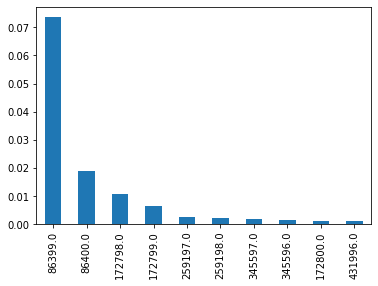

In [29]:
#session duration per user
dur_agg=df_user.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name="sum")
dur_agg

#min,max, average of sessions duration
dur_agg["sum"].describe()

#plot
(dur_agg['sum'].value_counts().head(10) / len(sm_df)).plot.bar()

#top 10 customers per session duration metric
dur_agg1=dur_agg.nlargest(10,'sum')
dur_agg1.to_csv("duration_10.csv")

##UL+DL

In [30]:
#total UL data per user
dur_agg_ul=df_user.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().reset_index(name="sum")
dur_agg_ul

# #min,max, average of UL sessions
dur_agg_ul['sum'].describe()
#plot
# (dur_agg_ul['sum'].value_counts().head(10) / len(sm_df)).plot.bar()

count    1.068560e+05
mean     5.730942e+07
std      3.565765e+07
min      2.866892e+06
25%      3.639547e+07
50%      4.679387e+07
75%      6.573199e+07
max      7.295774e+08
Name: sum, dtype: float64

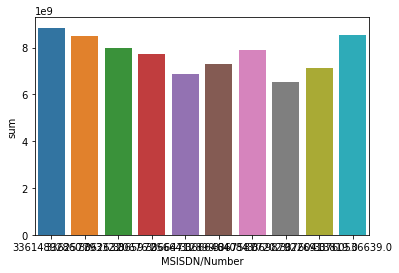

In [31]:
#top 10 customers per total Ul and DL metric
sum_data7=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user['Total UL+DL']=sum_data7
agg_ul_dl=df_user.groupby('MSISDN/Number')['Total UL+DL'].sum().reset_index(name="sum")
# agg_ul_dl
agg_ul_dl1=agg_ul_dl.nlargest(10,'sum')
agg_ul_dl1.to_csv("total_data10.csv")



# agg_ul_dl.plot(x="MSISDN/Number", y=["sum"], kind="bar")
# plt.show
sns.barplot(x="MSISDN/Number",y="sum",data=agg_ul_dl1)
plt.show()


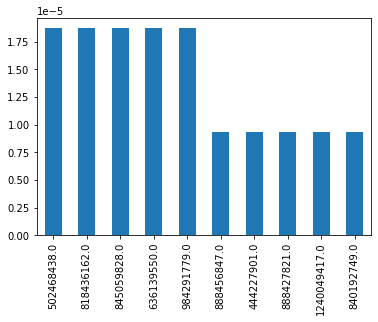

In [32]:
#total DL data per user
dur_agg_dl=df_user.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().reset_index(name="sum")
# dur_agg_dl

# #min,max, average of DL sessions
dur_agg_dl['sum'].describe()

#@title Default title text
(dur_agg_dl['sum'].value_counts().head(10) / len(sm_df)).plot.bar()



##K means engagement metrics

In [33]:
#engagament metrics kmeans clustering
data_eng = [xdr["count"], dur_agg["sum"],agg_ul_dl["sum"]]
headers = ["session frequency", "Duration",
          "Total Data" ]     
eng_metrics = pd.concat(data_eng, axis=1, keys=headers)
eng_metrics

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(eng_metrics[['session frequency', 'Duration', 'Total Data',]])

eng_metrics['Cluster'] = y

eng000 = eng_metrics[eng_metrics.Cluster==0]
eng000
eng111 =  eng_metrics[eng_metrics.Cluster==1]
eng111
eng222 =  eng_metrics[eng_metrics.Cluster==2]
eng222




,session frequency,Duration,Total Data,Cluster
4,2,37104.0,1.457411e+09,2
20,2,73674.0,1.632761e+09,2
29,3,162176.0,1.939527e+09,2
33,2,329753.0,1.449853e+09,2
51,2,107959.0,1.511483e+09,2
...,...,...,...,...
106808,2,113968.0,1.516157e+09,2
106812,2,71626.0,1.363064e+09,2
106823,3,491169.0,2.210363e+09,2
106838,4,702234.0,1.869162e+09,2


In [34]:
#normalize
norm_metrics=(eng_metrics-eng_metrics.min())/(eng_metrics.max()-eng_metrics.min())

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(norm_metrics[['session frequency', 'Duration', 'Total Data',]])

norm_metrics['Cluster'] = y
norm_metrics

eng00 = norm_metrics[norm_metrics.Cluster==0]
eng00
eng11 =  norm_metrics[norm_metrics.Cluster==1]
eng11
eng22 =  norm_metrics[norm_metrics.Cluster==2]
eng22


,session frequency,Duration,Total Data,Cluster
4,0.058824,0.001615,0.161598,2
6,0.058824,0.006536,0.070518,2
8,0.058824,0.026342,0.108577,2
20,0.058824,0.003587,0.181495,2
21,0.058824,0.011841,0.123637,2
...,...,...,...,...
106826,0.058824,0.030780,0.087849,2
106830,0.058824,0.009812,0.077284,2
106831,0.058824,0.002603,0.133886,2
106846,0.058824,0.010887,0.170976,2


In [35]:
e1=eng000.describe()
e1.to_csv("engoo.csv")
e1


,session frequency,Duration,Total Data,Cluster
count,49314.000000,4.931400e+04,4.931400e+04,49314.0
mean,1.060490,1.086224e+05,3.333198e+08,0.0
std,0.242527,8.060018e+04,1.468398e+08,0.0
min,1.000000,7.142000e+03,3.324901e+07,0.0
25%,1.000000,5.654200e+04,2.079928e+08,0.0
50%,1.000000,8.666050e+04,3.364347e+08,0.0
75%,1.000000,1.442202e+05,4.615216e+08,0.0
max,4.000000,1.576929e+06,5.798369e+08,0.0


In [36]:
e2=eng111.describe()
e2.to_csv("eng11.csv")


In [37]:
e3=eng222.describe()
e3.to_csv("eng22.csv")


In [38]:
alldistances = kmeans.fit_transform(norm_metrics)
# alldistances
ddf=pd.DataFrame(alldistances)
ddf.columns = ['0','1','2']
ddf

,0,1,2
0,1.030797,0.043551,2.001402
1,1.046509,0.038718,2.004219
2,1.036215,0.011763,2.002107
3,1.040147,0.009206,2.002811
4,1.013472,2.003771,0.040133
...,...,...,...
106851,1.033990,0.025541,2.001773
106852,1.038711,0.003548,2.002543
106853,1.044495,0.051235,2.004088
106854,1.036084,0.014104,2.002102


In [39]:
norm_metrics['Cluster'].value_counts()

0    81180
2    21621
1     4055
Name: Cluster, dtype: int64

##engagement score

In [40]:
#engagemnt score

engagement_data= [df_user["MSISDN/Number"],ddf["1"]]
engagement_data
# headers = ["MSISDN/Number","engagement_score"]  
# engagement_score=pd.concat(engagement_data,axis=1,keys=headers)
# engagement_score


[0         3.366496e+10
 1         3.368185e+10
 2         3.376063e+10
 3         3.375034e+10
 4         3.369980e+10
               ...     
 149996    3.365069e+10
 149997    3.366345e+10
 149998    3.362189e+10
 149999    3.361962e+10
 150000             NaN
 Name: MSISDN/Number, Length: 150001, dtype: float64, 0         0.043551
 1         0.038718
 2         0.011763
 3         0.009206
 4         2.003771
             ...   
 106851    0.025541
 106852    0.003548
 106853    0.051235
 106854    0.014104
 106855    0.057735
 Name: 1, Length: 106856, dtype: float64]

In [41]:
data_eng1 = [xdr["MSISDN/Number"],xdr["count"], dur_agg["sum"],agg_ul_dl["sum"],norm_metrics["Cluster"]]
headers1 = ["Customer Number","session frequency", "Duration",
          "Total Data","Cluster" ] 
non_norm=pd.concat(data_eng1,axis=1,keys=headers1)
non_norm

,Customer Number,session frequency,Duration,Total Data,Cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0
1,3.360100e+10,1,181230.0,1.568596e+08,0
2,3.360100e+10,1,134969.0,5.959665e+08,0
3,3.360101e+10,1,49878.0,4.223207e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,2
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08,0
106852,3.379000e+10,1,140988.0,4.803073e+08,0
106853,3.197021e+12,1,877385.0,2.321240e+08,0
106854,3.370000e+14,1,253030.0,5.962878e+08,0


In [42]:
nn00 = non_norm[non_norm.Cluster==0]
nn00.describe()


,Customer Number,session frequency,Duration,Total Data,Cluster
count,8.118000e+04,81180.000000,8.118000e+04,8.118000e+04,81180.0
mean,4.873302e+10,1.042486,1.070061e+05,4.955396e+08,0.0
std,3.315016e+12,0.201696,7.857713e+04,2.401247e+08,0.0
min,3.360100e+10,1.000000,7.142000e+03,3.324901e+07,0.0
25%,3.365078e+10,1.000000,5.579325e+04,2.921233e+08,0.0
50%,3.366365e+10,1.000000,8.640000e+04,4.971658e+08,0.0
75%,3.368355e+10,1.000000,1.421178e+05,6.984119e+08,0.0
max,8.823971e+14,2.000000,1.573420e+06,9.507607e+08,0.0


In [43]:
nn11 =  non_norm[non_norm.Cluster==1]
nn11.describe()


,Customer Number,session frequency,Duration,Total Data,Cluster
count,4.055000e+03,4055.000000,4.055000e+03,4.055000e+03,4055.0
mean,3.367781e+10,4.251541,5.701214e+05,2.282185e+09,1.0
std,4.337330e+07,1.233218,6.665565e+05,6.529753e+08,0.0
min,3.360105e+10,3.000000,4.689600e+04,1.085994e+09,1.0
25%,3.365883e+10,4.000000,3.349950e+05,1.886013e+09,1.0
50%,3.366418e+10,4.000000,4.229990e+05,2.137531e+09,1.0
75%,3.368498e+10,5.000000,5.358010e+05,2.540734e+09,1.0
max,3.378988e+10,18.000000,1.855375e+07,8.846226e+09,1.0


In [44]:
nn22 =  non_norm[non_norm.Cluster==2]
nn22.describe()

,Customer Number,session frequency,Duration,Total Data,Cluster
count,2.162100e+04,21621.000000,2.162100e+04,2.162100e+04,21621.0
mean,3.367423e+10,2.176865,2.136923e+05,1.126279e+09,2.0
std,4.520227e+07,0.405767,1.453409e+05,2.958691e+08,0.0
min,3.360101e+10,2.000000,1.823500e+04,2.842182e+08,2.0
25%,3.365092e+10,2.000000,1.159930e+05,8.934688e+08,2.0
50%,3.366357e+10,2.000000,1.816320e+05,1.100238e+09,2.0
75%,3.368291e+10,2.000000,2.680030e+05,1.345911e+09,2.0
max,3.378998e+10,4.000000,3.174824e+06,1.873330e+09,2.0


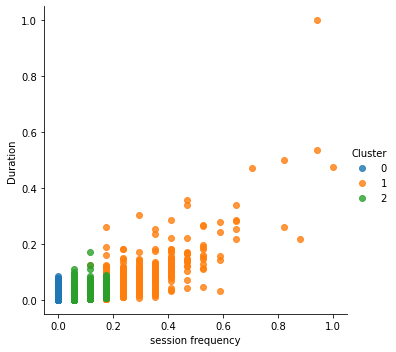

In [45]:
sns.lmplot(x='session frequency',y='Duration',data=norm_metrics,hue='Cluster',fit_reg=False)


##DECILE

In [46]:
#decile
dur_agg['Decile_rank']=pd.qcut(dur_agg['sum'],10,labels=False)
print(dur_agg)


        MSISDN/Number       sum  Decile_rank
0        3.360100e+10  116720.0            5
1        3.360100e+10  181230.0            7
2        3.360100e+10  134969.0            6
3        3.360101e+10   49878.0            1
4        3.360101e+10   37104.0            1
...               ...       ...          ...
106851   3.379000e+10    8810.0            0
106852   3.379000e+10  140988.0            6
106853   3.197021e+12  877385.0            9
106854   3.370000e+14  253030.0            8
106855   8.823971e+14  869844.0            9

[106856 rows x 3 columns]


In [47]:
decile1 = dur_agg[dur_agg['Decile_rank']==0]
sum_data22=df_user['Total DL (Bytes)']+df_user['Total UL (Bytes)']
df_user['Total UL+DL']=sum_data22
numbers1 = df_user["Total UL+DL"]
decile1 = decile1.join(numbers1)
decile1.loc['Total'] = pd.Series(decile1['Total UL+DL'].sum(), index = ['Total UL+DL'])
decile1



,MSISDN/Number,sum,Decile_rank,Total UL+DL
18,3.360103e+10,21785.0,0.0,4.105172e+08
30,3.360105e+10,29046.0,0.0,4.413361e+08
36,3.360106e+10,10532.0,0.0,8.192371e+08
39,3.360107e+10,12842.0,0.0,3.213596e+08
61,3.360112e+10,12921.0,0.0,1.158680e+08
...,...,...,...,...
106811,3.378965e+10,25058.0,0.0,1.950602e+08
106822,3.378973e+10,15675.0,0.0,7.180468e+07
106824,3.378978e+10,16388.0,0.0,7.577812e+08
106851,3.379000e+10,8810.0,0.0,3.490572e+08


In [48]:
decile2 = dur_agg[dur_agg['Decile_rank']==1]
decile2
numbers2 = df_user["Total UL+DL"]
decile2 = decile2.join(numbers2)
decile2.loc['Total'] = pd.Series(decile2['Total UL+DL'].sum(), index = ['Total UL+DL'])
decile2


,MSISDN/Number,sum,Decile_rank,Total UL+DL
3,3.360101e+10,49878.0,1.0,8.893527e+08
4,3.360101e+10,37104.0,1.0,6.076814e+08
11,3.360102e+10,38416.0,1.0,5.688098e+08
15,3.360103e+10,34544.0,1.0,1.010470e+08
28,3.360105e+10,31778.0,1.0,1.566568e+08
...,...,...,...,...
106833,3.378986e+10,33395.0,1.0,2.772944e+08
106834,3.378988e+10,47989.0,1.0,4.454315e+08
106841,3.378991e+10,44199.0,1.0,6.595400e+08
106845,3.378994e+10,36812.0,1.0,3.558281e+08


In [49]:
decile3 = dur_agg[dur_agg['Decile_rank']==2]
numbers3 = df_user["Total UL+DL"]
decile3 = decile3.join(numbers3)
decile3.loc['Total'] = pd.Series(decile3['Total UL+DL'].sum(), index = ['Total UL+DL'])
decile3


,MSISDN/Number,sum,Decile_rank,Total UL+DL
17,3.360103e+10,55730.0,2.0,2.878509e+08
19,3.360103e+10,74893.0,2.0,7.640126e+08
20,3.360103e+10,73674.0,2.0,4.484330e+08
25,3.360104e+10,79098.0,2.0,5.196047e+08
26,3.360104e+10,82844.0,2.0,1.739165e+08
...,...,...,...,...
106812,3.378965e+10,71626.0,2.0,7.663590e+08
106825,3.378978e+10,69600.0,2.0,5.170243e+08
106831,3.378984e+10,55422.0,2.0,5.447301e+08
106844,3.378992e+10,54339.0,2.0,6.304952e+08


In [50]:
decile4 = dur_agg[dur_agg['Decile_rank']==3]
numbers4 = df_user["Total UL+DL"]
decile4 = decile4.join(numbers4)
decile4.loc['Total'] = pd.Series(decile4['Total UL+DL'].sum(), index = ['Total UL+DL'])
decile4

,MSISDN/Number,sum,Decile_rank,Total UL+DL
7,3.360101e+10,86399.0,3.0,8.341634e+08
40,3.360107e+10,86399.0,3.0,4.505742e+08
47,3.360108e+10,86399.0,3.0,2.342892e+08
69,3.360115e+10,86399.0,3.0,4.293646e+08
73,3.360115e+10,86400.0,3.0,3.669177e+08
...,...,...,...,...
106813,3.378965e+10,86400.0,3.0,1.901681e+08
106821,3.378970e+10,85989.0,3.0,4.454088e+08
106835,3.378988e+10,86400.0,3.0,2.520983e+08
106842,3.378991e+10,86399.0,3.0,6.706397e+08


In [51]:
decile5 = dur_agg[dur_agg['Decile_rank']==4]
numbers5 = df_user["Total UL+DL"]
decile5 = decile5.join(numbers5)
decile5.loc['Total'] = pd.Series(decile5['Total UL+DL'].sum(), index = ['Total UL+DL'])
decile5


,MSISDN/Number,sum,Decile_rank,Total UL+DL
12,3.360102e+10,97363.0,4.0,8.487990e+08
16,3.360103e+10,91753.0,4.0,1.995935e+08
23,3.360104e+10,100371.0,4.0,8.341272e+08
24,3.360104e+10,98337.0,4.0,9.303346e+08
32,3.360106e+10,93304.0,4.0,8.985983e+08
...,...,...,...,...
106793,3.378957e+10,101111.0,4.0,8.707996e+08
106798,3.378958e+10,100162.0,4.0,1.469251e+08
106843,3.378991e+10,98294.0,4.0,7.061109e+08
106847,3.378996e+10,98826.0,4.0,8.737397e+08


##AVG RTT

In [52]:
sum_column_10 = df_user["Avg RTT DL (ms)"] + df_user["Avg RTT UL (ms)"]
df_user["Total Avg RTT"] = sum_column_10
rtt_df=df_user.groupby('MSISDN/Number')['Total Avg RTT'].sum().reset_index(name='Total_Avg_RTT')
rtt_df


#top 10
r1=rtt_df.nlargest(10,'Total_Avg_RTT')
r1.to_csv("r10.csv")



In [53]:
#bottom 10
r2=rtt_df.nsmallest(10,'Total_Avg_RTT')
r2.to_csv("r10small.csv")

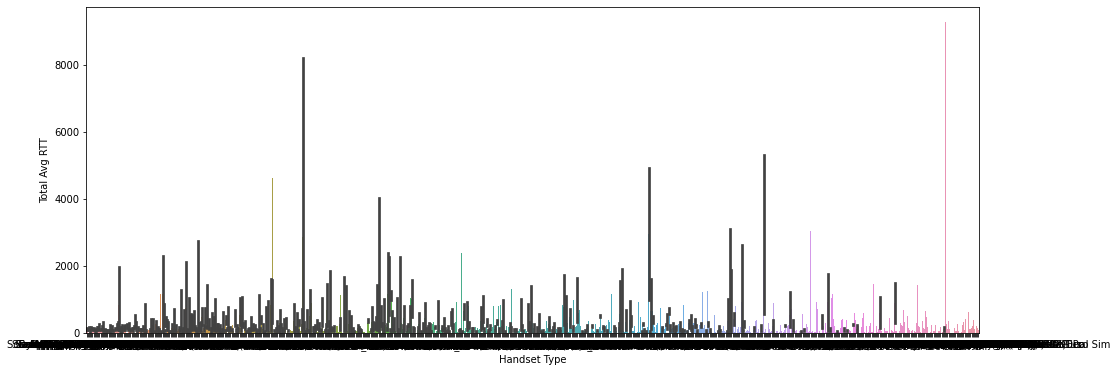

In [54]:
#PLOT
df_user1=df_user.sample(frac =.25)
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Handset Type', y='Total Avg RTT',ax=ax,data=df_user1)


##TCP

In [55]:
sum_column11 = df_user["TCP DL Retrans. Vol (Bytes)"] + df_user["TCP UL Retrans. Vol (Bytes)"]
df_user["Total TCP Retrans"] = sum_column11
tcp_df=df_user.groupby('MSISDN/Number')['Total TCP Retrans'].sum().reset_index(name='Total_TCP_Retrans')
tcp_df


#top 10
t1=tcp_df.nlargest(10,'Total_TCP_Retrans')
t1.to_csv("tcp10.csv")

In [56]:
t2=tcp_df.nsmallest(10,'Total_TCP_Retrans')
t2.to_csv("tcp10small.csv")

In [57]:
tcp_df.mode()['Total_TCP_Retrans'][0]


0.0

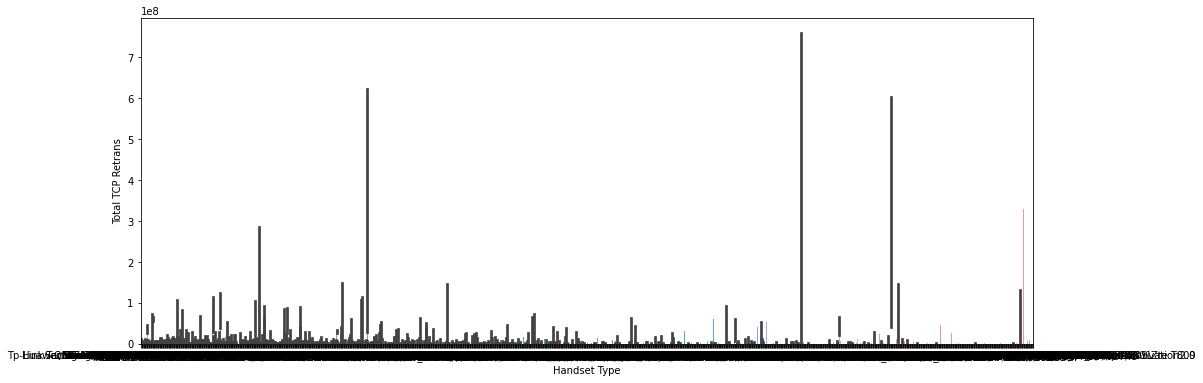

In [58]:
#PLOT
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Handset Type', y='Total TCP Retrans',ax=ax,data=df_user)


##Handset Type

In [59]:
handset_df=df_user.groupby('MSISDN/Number')['Handset Type'].count().reset_index(name='Handset count')
handset_df


data_h = [df_user["Handset Type"],handset_df["Handset count"]]
headers = ["Handset Type","Handset count" ]     
hdf11 = pd.concat(data_h, axis=1, keys=headers)
hdf11
hdf11.sort_values(['Handset Type', 'Handset count'], ascending=False).groupby('Handset count')


In [60]:
hdf11.nlargest(25,'Handset count')



,Handset Type,Handset count
13526,Lg-H815,18.0
6437,Apple iPhone Se (A1723),17.0
13180,Apple iPhone 6 (A1586),17.0
37052,Huawei B528S-23A,16.0
76363,Huawei Honor 8X,15.0
92923,Apple iPhone X (A1901),15.0
65118,Huawei P9,13.0
666,Apple iPhone 8 Plus (A1897),12.0
1279,Huawei B528S-23A,12.0
13994,Huawei Cor-L29,12.0


##Throughput

In [61]:
sum_column12 = df_user["Avg Bearer TP DL (kbps)"] + df_user["Avg Bearer TP UL (kbps)"]
df_user["Total Avg TP"] = sum_column12
tp_df=df_user.groupby('MSISDN/Number')['Total Avg TP'].sum().reset_index(name='Total_Avg_TP_(kbps)')
tp_df

#top 10
tp1=tp_df.nlargest(10,'Total_Avg_TP_(kbps)')
tp1.to_csv("tp10.csv")
tp2=tp_df.nsmallest(10,'Total_Avg_TP_(kbps)')
tp2.to_csv("tpsmall.csv")


In [62]:
tp_data= [tp_df["Total_Avg_TP_(kbps)"],hdf11["Handset Type"]]
headers122 = ["Total Avg Throughput","Handset Type"]  
thr_df=pd.concat(tp_data,axis=1,keys=headers122)
thr_df.to_csv("thr_h.csv")
# sns.barplot(y="Total Avg Throughput",x="Handset Type",data=thr_df)


In [63]:
tp_data= [rtt_df["Total_Avg_RTT"],hdf11["Handset Type"]]
headers122 = ["Total Avg RTT","Handset Type"]  
thr_df1=pd.concat(tp_data,axis=1,keys=headers122)
thr_df1.to_csv("rttt.csv")


In [64]:
tp_data= [tcp_df["Total_TCP_Retrans"],hdf11["Handset Type"]]
headers122 = ["Total TCP Retrans","Handset Type"]  
thr_df1=pd.concat(tp_data,axis=1,keys=headers122)
thr_df1.to_csv("tcp.csv")

##CORRELATION ANALYSIS

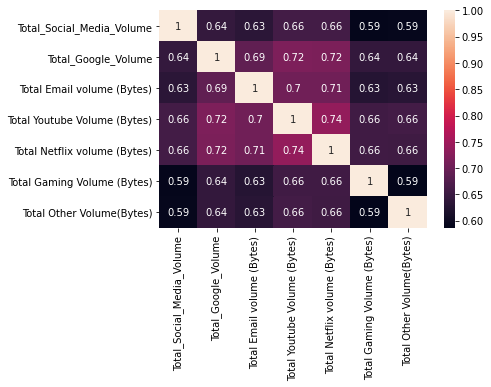

In [65]:
#Correlation Analysis
data = [sm_df["Total_Social_Media_Volume"], gg_df["Total_Google_Volume"],em_df["Total Email volume (Bytes)"],yt_df["Total Youtube Volume (Bytes)"],nf_df["Total Netflix volume (Bytes)"],
        gm_df["Total Gaming Volume (Bytes)"],other_df["Total Other Volume(Bytes)"]]
headers = ["Total_Social_Media_Volume", "Total_Google_Volume",
           "Total Email volume (Bytes)","Total Youtube Volume (Bytes)",
           "Total Netflix volume (Bytes)","Total Gaming Volume (Bytes)",
          "Total Other Volume(Bytes)" ]     
matrix_df = pd.concat(data, axis=1, keys=headers)

# matrix_df.loc['Total'] = pd.Series(matrix_df['Total Email volume (Bytes)'].sum(), index = ['Total Email volume (Bytes)'])
# matrix_df
matrix1=matrix_df.sum(axis = 0, skipna = True) 
matrix1.to_csv("mat.csv",header=['sum'])
matrix2=matrix1.to_frame()
matrix2


type(matrix1)

corrMatrix = matrix_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [66]:
matrix1
matrix1.sort_values(inplace=True, ascending=False)
matrix3=matrix1.to_frame()
matrix3.head(3)


,0
Total Gaming Volume (Bytes),6.408892e+13
Total Other Volume(Bytes),6.395425e+13
Total Youtube Volume (Bytes),3.372204e+12


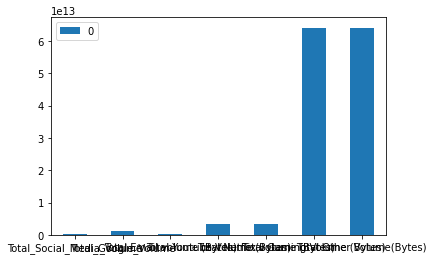

In [67]:

matrix2.plot.bar(rot=0)


##PCA 

In [68]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(matrix_df)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
pc_df.head()


,PC1,PC2
0,1.948352e+05,3.002591e+08
1,-5.641688e+08,-1.151704e+08
2,-1.121405e+08,2.541578e+07
3,-5.467620e+08,2.509668e+08
4,6.519344e+08,3.594493e+08


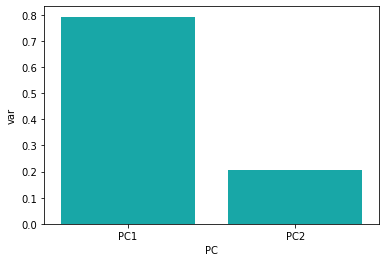

In [69]:
dd = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=dd, color="c");

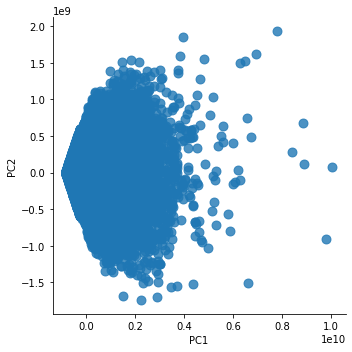

In [70]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80})


##K-means engagement(Experience Analytics)


In [71]:
data1 = [rtt_df["MSISDN/Number"],tp_df["Total_Avg_TP_(kbps)"],tcp_df["Total_TCP_Retrans"],rtt_df["Total_Avg_RTT"]]
headers = [ "MSISDN/Number","Total_Avg_TP_(kbps)", "Total_TCP_Retrans",
           "Total_Avg_RTT",
           ]     
experience_df = pd.concat(data1, axis=1, keys=headers)
experience_df.fillna(experience_df.mean(), inplace=True)
experience_df

norm_experience=(experience_df-experience_df.min())/(experience_df.max()-experience_df.min())


kmeans1 = KMeans(n_clusters=3)

y = kmeans1.fit_predict(norm_experience[['Total_Avg_TP_(kbps)', 'Total_TCP_Retrans', 'Total_Avg_RTT',]])

norm_experience['Cluster'] = y


# print(experience_df)

df00 = norm_experience[norm_experience.Cluster==0]
df00
df11 =  norm_experience[norm_experience.Cluster==1]
df11
df22 =  norm_experience[norm_experience.Cluster==2]
df22



,MSISDN/Number,Total_Avg_TP_(kbps),Total_TCP_Retrans,Total_Avg_RTT,Cluster
147,3.154664e-10,0.326117,0.000172,0.002951,2
166,3.526540e-10,0.189102,0.001245,0.000506,2
433,1.327992e-09,0.171350,0.000088,0.000898,2
557,1.891666e-09,0.166886,0.000000,0.001114,2
636,2.345082e-09,0.177195,0.000168,0.001094,2
...,...,...,...,...,...
106272,2.105683e-07,0.164175,0.013550,0.000805,2
106295,2.106411e-07,0.285686,0.000072,0.000444,2
106497,2.116965e-07,0.162174,0.001221,0.000887,2
106845,2.141302e-07,0.156627,0.000336,0.000537,2


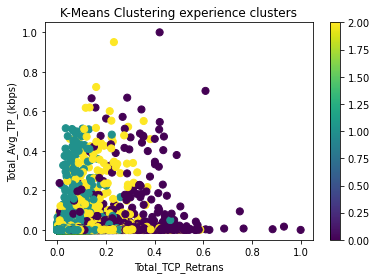

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(norm_experience['Total_Avg_TP_(kbps)'],norm_experience['Total_TCP_Retrans'],
                     c=kmeans.labels_,s=50)
ax.set_title('K-Means Clustering experience clusters')
ax.set_xlabel('Total_TCP_Retrans')
ax.set_ylabel('Total_Avg_TP_(kbps)')
plt.colorbar(scatter)

In [73]:
norm_experience['Cluster'].value_counts()

0    85244
1    18941
2     2671
Name: Cluster, dtype: int64

In [74]:
alldistances1 = kmeans1.fit_transform(norm_experience)
# alldistances
ddf2=pd.DataFrame(alldistances1)
ddf2.columns = ['0','1','2']
ddf2

,0,1,2
0,1.002775,0.005309,2.013610
1,1.002773,0.005311,2.013607
2,1.002774,0.005384,2.013608
3,1.002760,0.005070,2.013587
4,0.011797,1.001663,1.014548
...,...,...,...
106851,1.001992,0.006221,2.012327
106852,1.002772,0.005276,2.013605
106853,1.002788,0.006545,2.013624
106854,1.073036,0.381913,2.049510


##experience score

In [75]:
#experience scores

experience_data= [norm_experience["MSISDN/Number"],ddf2["1"]]
headers11 = ["MSISDN/Number","experience_score"]  
experience_score=pd.concat(experience_data,axis=1,keys=headers11)
experience_score


,MSISDN/Number,experience_score
0,0.000000e+00,0.005309
1,3.626623e-14,0.005311
2,8.941893e-13,0.005384
3,6.924584e-12,0.005070
4,7.814240e-12,1.001663
...,...,...
106851,2.141911e-07,0.006221
106852,2.141924e-07,0.005276
106853,3.585166e-03,0.006545
106854,3.818907e-01,0.381913


##satisfaction score

In [76]:
satisfaction_data= [xdr["MSISDN/Number"],experience_score["experience_score"],ddf["1"]]
satisfaction_data
headers22=['MSISDN/Number',"experience_score","engagement_score"]
satisfaction_score=pd.concat(satisfaction_data,axis=1,keys=headers22)
satisfaction_score

satisfaction_score['satisfaction_score'] = satisfaction_score[['experience_score', 'engagement_score']].mean(axis=1)
satisfaction_score.to_csv("satis.csv")

In [77]:
s1=satisfaction_score.nlargest(10,'satisfaction_score')
s1.to_csv("s.csv")

## Regression 



In [78]:
X = satisfaction_score['experience_score']  
Y = satisfaction_score['engagement_score']

X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)
 # with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



# New_experience_score = 2.004168
# New_engagement_score = 1.638166	
# print ('Predicted Stock Index Price: \n', regr.predict([[New_experience_score ,New_engagement_score]]))




X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [0.35252202]
Coefficients: 
 [[0.47778455]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     9363.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:31:08   Log-Likelihood:            -1.2310e+05
No. Observations:              106856   AIC:                         2.462e+05
Df Residuals:                  106854   BIC:                         2.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

##k=means satisfactory analysis


In [79]:

kmeans1 = KMeans(n_clusters=2)

y = kmeans1.fit_predict(satisfaction_score[['experience_score', 'engagement_score']])

satisfaction_score['Cluster'] = y
satisfaction_score

,MSISDN/Number,experience_score,engagement_score,satisfaction_score,Cluster
0,3.360100e+10,0.005309,0.043551,0.024430,0
1,3.360100e+10,0.005311,0.038718,0.022015,0
2,3.360100e+10,0.005384,0.011763,0.008573,0
3,3.360101e+10,0.005070,0.009206,0.007138,0
4,3.360101e+10,1.001663,2.003771,1.502717,1
...,...,...,...,...,...
106851,3.379000e+10,0.006221,0.025541,0.015881,0
106852,3.379000e+10,0.005276,0.003548,0.004412,0
106853,3.197021e+12,0.006545,0.051235,0.028890,0
106854,3.370000e+14,0.381913,0.014104,0.198009,0


In [80]:
##average per cluster
df001 = satisfaction_score[satisfaction_score.Cluster==0]
df001

print("average experience score",df001["experience_score"].mean())
print("average satisfaction score",df001["satisfaction_score"].mean())


average experience score 0.14402651449074313
average satisfaction score 0.08507177728187494


In [81]:
df111 = satisfaction_score[satisfaction_score.Cluster==0]
df111["satisfaction_score"].mean() 


0.08507177728187494

In [82]:
df111 = satisfaction_score[satisfaction_score.Cluster==0]
df111["experience_score"].mean() 


0.14402651449074313

In [83]:
df112 = satisfaction_score[satisfaction_score.Cluster==1]
df112["satisfaction_score"].mean()

1.1863502692521954

In [84]:
df112 = satisfaction_score[satisfaction_score.Cluster==1]
df112["experience_score"].mean()

0.5214649575111897